In [1]:
import pandas as pd 
import os 
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "./opt_algo_results/"
cec_eval_xl_files = [f for f in os.listdir("./opt_algo_results/") if "xlsx" in f]
cec_eval_json_files = [f for f in os.listdir("./opt_algo_results/") if "json" in f]
print(cec_eval_xl_files)
print(cec_eval_json_files)

['CEC_functions_DA_Evaluation_Report.xlsx', 'CEC_functions_WAO_DA_Evaluation_Report.xlsx', 'CEC_functions_WAO_Evaluation_Report.xlsx']
['da_results.json', 'wao_da_results.json', 'wao_results.json']


In [3]:
evals_dict = {}
replacements = ["_Evaluation_Report.xlsx", "CEC_functions_"]
for file in cec_eval_xl_files:
    with pd.ExcelFile(f"{data_dir}{file}") as f:
        df = pd.read_excel(f)     
    for r in replacements:    
        file = file.replace(r, "")    
    df["Algorithm"] = file
    df = df[[c for c in df.columns if "Fi" not in c]   ]
    evals_dict[file] = df

In [4]:
evals_dict.keys()

dict_keys(['DA', 'WAO_DA', 'WAO'])

In [5]:
evals_dict["DA"]

,target_function,Best,Worst,AVG,median,STD,Algorithm
0,Rastrigin,2.026000e+00,1.585675e+04,8.957896e+01,2.026000e+00,7.826414e+02,DA
1,Griewank,7.790000e-02,4.741800e+00,1.059178e-01,7.790000e-02,2.252769e-01,DA
2,Ackley,1.354400e+00,2.214410e+01,1.488806e+00,1.354400e+00,1.196856e+00,DA
3,Happy Cat,1.793400e+00,8.125026e+02,7.327393e+00,1.793400e+00,4.141208e+01,DA
4,Expanded Scaffer6,1.267900e+00,5.559800e+00,1.319108e+00,1.284900e+00,2.270332e-01,DA
5,Weierstrass,1.000000e+00,1.539160e+01,1.054206e+00,1.000000e+00,7.032871e-01,DA
6,Schwefel,1.752600e+00,1.589873e+03,9.291204e+00,1.752600e+00,7.439938e+01,DA
7,Lennard_Jones,7.063800e+00,1.262360e+01,7.953417e+00,7.486700e+00,1.212796e+00,DA
8,Hilbert,3.781618e+02,3.175211e+04,8.517340e+02,3.781618e+02,2.031305e+03,DA
9,Chebyshev,1.634950e+06,1.813016e+09,7.120053e+06,1.634950e+06,8.156656e+07,DA


In [6]:
df_temp = pd.concat(evals_dict.values(), axis=0)

In [7]:
agg_dict = {c: lambda x: x for c in df_temp.columns if c not in ["target_function", "Algorithm"]}
df_agg = df_temp.groupby(["target_function", "Algorithm"]).agg(agg_dict)

In [8]:
df_agg.to_excel("./report/Results_Trial.xlsx")

In [9]:
replacements_json = ["_results.json"]
evals_json_dict = {}
for file in cec_eval_json_files:
    with open(f"{data_dir}{file}", "r") as f:
        for r in replacements_json:    
            file = file.replace(r, "")    
        evals_json_dict[file] = json.load(f)


In [10]:
iter_evals_per_opt_per_target_f = {}
for opt_algo, eval_list in evals_json_dict.items():
    temp_dict = {}    
    for ev in eval_list:
        temp_dict[ev["target_function"]] = ev[f"{opt_algo}_evaluations"]  
    avg_temp_dict = {}
    avg_temp_dict["opt_algo"] = opt_algo
    for target_fn, exp_evals in temp_dict.items():      
        avg_temp_dict[target_fn] = np.min(exp_evals, axis=0)
    iter_evals_per_opt_per_target_f[opt_algo] = avg_temp_dict


In [11]:
df_exp_avg_evals =pd.DataFrame(iter_evals_per_opt_per_target_f).T.reset_index(drop=True)
df_exp_avg_evals

,opt_algo,Rastrigin,Griewank,Ackley,Happy Cat,Expanded Scaffer6,Weierstrass,Schwefel,Lennard_Jones,Hilbert,Chebyshev
0,da,"[5987.145771058677, 1.0, 1.0, 1.0, 1.0, 1.0, 1...","[2.32256697209585, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[21.873693663839116, 1.0000000000000004, 1.000...","[331.02250788107034, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[5.161205238085425, 1.0, 1.0, 1.0, 1.0, 1.0, 1...","[13.016000865393742, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[919.2885407495564, 1.0, 1.0, 1.0, 1.0, 1.0, 1...","[11.802437658666685, 11.801026828306755, 11.80...","[10509.350856271109, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[415597376.4266387, 1.0, 1.0, 1.0, 1.0, 1.0, 1..."
1,wao_da,"[326.67760362939134, 211.90379136885497, 211.9...","[1.0366712390894954, 1.0366712390894954, 0.940...","[16.814943911733202, 16.814943911733202, 14.43...","[19.92417500082895, 14.14911240126734, 14.1491...","[4.546453493608299, 3.982035717334804, 3.85640...","[9.954394659375522, 9.954394659375522, 8.39778...","[59.640226616571454, 50.55773000161298, 31.387...","[8.196231307439112, 8.19275637686745, 8.192756...","[5622.496980504746, 2173.710044649266, 2173.71...","[12375970.953201413, 12375970.953201413, 12258..."
2,wao,"[8515.590522192857, 7729.9881886515595, 7214.3...","[2.391489083060484, 2.275148874729303, 2.20717...","[21.461815544975703, 21.461815544975703, 21.46...","[282.36102348714775, 257.21073071590274, 232.1...","[4.680235543073103, 4.680235543073103, 4.68023...","[12.331224207390221, 12.331224207390221, 10.50...","[653.9557076974816, 619.5141968628614, 558.266...","[10.986063268708266, 10.986063268708266, 10.98...","[12033.945075728736, 12013.573081256018, 11998...","[266754336.2144058, 264604418.80195418, 263404..."


In [13]:
df_exp_avg_evals = df_exp_avg_evals[df_exp_avg_evals["opt_algo"] != 'da']
df_exp_avg_evals

,opt_algo,Rastrigin,Griewank,Ackley,Happy Cat,Expanded Scaffer6,Weierstrass,Schwefel,Lennard_Jones,Hilbert,Chebyshev
1,wao_da,"[326.67760362939134, 211.90379136885497, 211.9...","[1.0366712390894954, 1.0366712390894954, 0.940...","[16.814943911733202, 16.814943911733202, 14.43...","[19.92417500082895, 14.14911240126734, 14.1491...","[4.546453493608299, 3.982035717334804, 3.85640...","[9.954394659375522, 9.954394659375522, 8.39778...","[59.640226616571454, 50.55773000161298, 31.387...","[8.196231307439112, 8.19275637686745, 8.192756...","[5622.496980504746, 2173.710044649266, 2173.71...","[12375970.953201413, 12375970.953201413, 12258..."
2,wao,"[8515.590522192857, 7729.9881886515595, 7214.3...","[2.391489083060484, 2.275148874729303, 2.20717...","[21.461815544975703, 21.461815544975703, 21.46...","[282.36102348714775, 257.21073071590274, 232.1...","[4.680235543073103, 4.680235543073103, 4.68023...","[12.331224207390221, 12.331224207390221, 10.50...","[653.9557076974816, 619.5141968628614, 558.266...","[10.986063268708266, 10.986063268708266, 10.98...","[12033.945075728736, 12013.573081256018, 11998...","[266754336.2144058, 264604418.80195418, 263404..."


Plot saved as ./report/convergence_curve_of_Rastrigin_new


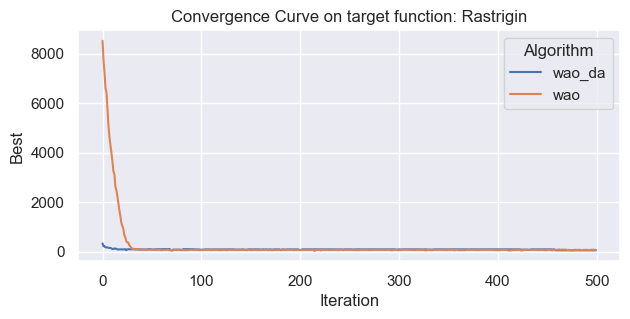

Plot saved as ./report/convergence_curve_of_Griewank_new


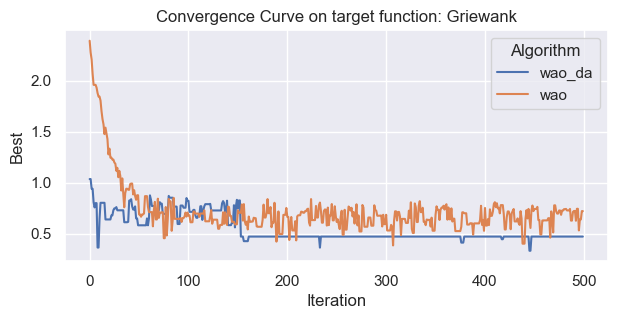

Plot saved as ./report/convergence_curve_of_Ackley_new


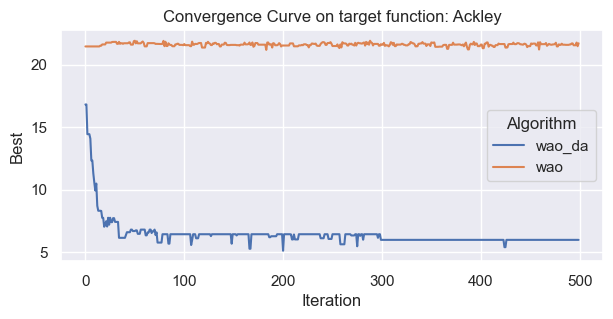

Plot saved as ./report/convergence_curve_of_Happy Cat_new


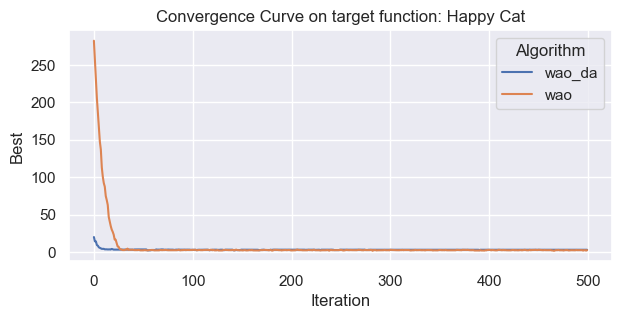

Plot saved as ./report/convergence_curve_of_Expanded Scaffer6_new


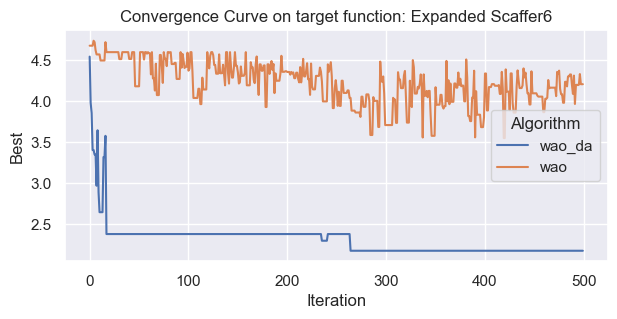

Plot saved as ./report/convergence_curve_of_Weierstrass_new


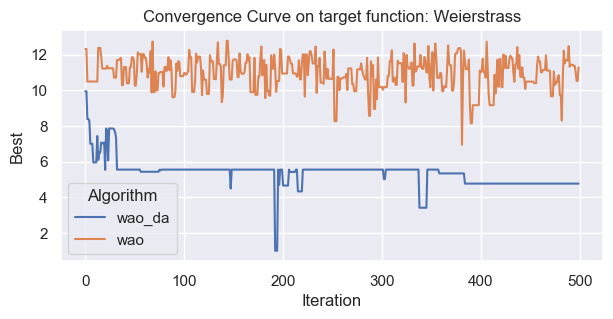

Plot saved as ./report/convergence_curve_of_Schwefel_new


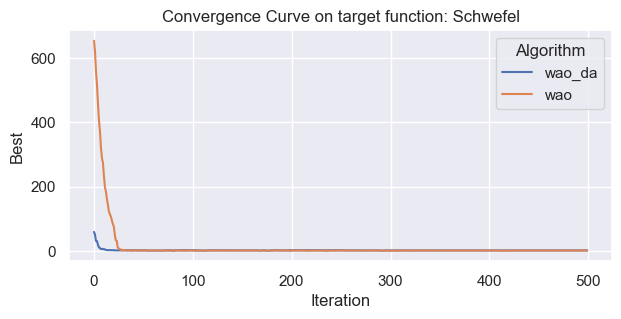

Plot saved as ./report/convergence_curve_of_Lennard_Jones_new


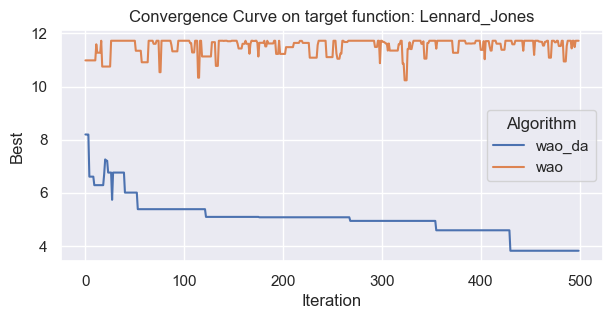

Plot saved as ./report/convergence_curve_of_Hilbert_new


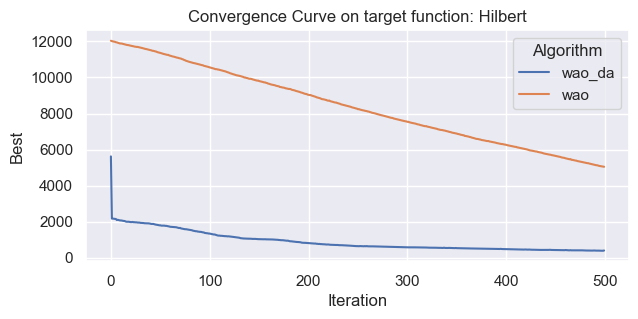

Plot saved as ./report/convergence_curve_of_Chebyshev_new


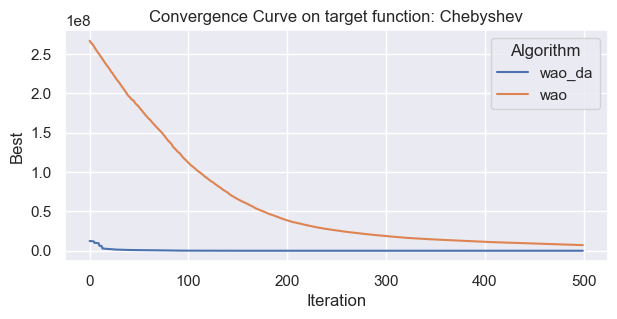

In [14]:
# Plotting
sns.set_theme()
for col in df_exp_avg_evals.columns[1:]:
    plt.figure(figsize=(7, 3))
    for i, row in df_exp_avg_evals.iterrows():
        sns.lineplot(data=row[col], label=f'{row["opt_algo"]}')

    plt.title(f'Convergence Curve on target function: {col}')
    plt.xlabel('Iteration')
    plt.ylabel('Best')
    plt.legend(title='Algorithm')
    plt.grid(True)
    save_path = f"./report/convergence_curve_of_{col}_new"
    plt.savefig(save_path, bbox_inches='tight')
    print(f"Plot saved as {save_path}")
    plt.show()